## Import Different library

In [333]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression


## Load the Kaggle data set of car prices

In [289]:
df = pd.read_csv('Car_Prices_Poland_Kaggle.csv')
df1 = pd.read_csv('Car_Prices_Poland_Kaggle.csv')

## See their Heads for the data Identification

In [290]:
df.head()

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


## Details of variabeles which are being used in the data set

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       117927 non-null  int64 
 1   mark             117927 non-null  object
 2   model            117927 non-null  object
 3   generation_name  87842 non-null   object
 4   year             117927 non-null  int64 
 5   mileage          117927 non-null  int64 
 6   vol_engine       117927 non-null  int64 
 7   fuel             117927 non-null  object
 8   city             117927 non-null  object
 9   province         117927 non-null  object
 10  price            117927 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 9.9+ MB


## Know my data 

In [292]:
df.shape

(117927, 11)

## Check the inside data

In [293]:
df.isnull().sum()

Unnamed: 0             0
mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

## Remove the null values from the Database

In [294]:
df_clean = df.dropna()
df_clean.isnull().sum()

Unnamed: 0         0
mark               0
model              0
generation_name    0
year               0
mileage            0
vol_engine         0
fuel               0
city               0
province           0
price              0
dtype: int64

### Check the data after the Cleaning

In [295]:
df_clean.shape

(87842, 11)

## Assighn the new selected variables 

In [296]:
df_clean = df[['year','mileage','vol_engine','price']]

In [297]:
df_clean.head()

,year,mileage,vol_engine,price
0,2015,139568,1248,35900
1,2018,31991,1499,78501
2,2015,278437,1598,27000
3,2016,47600,1248,30800
4,2014,103000,1400,35900


In [298]:
df_clean.dtypes

year          int64
mileage       int64
vol_engine    int64
price         int64
dtype: object

In [299]:
df_clean.head(1)

,year,mileage,vol_engine,price
0,2015,139568,1248,35900


In [300]:
X = df_clean[['mileage','vol_engine']]
y = df_clean['price']

In [301]:
X.isnull().sum()

mileage       0
vol_engine    0
dtype: int64

In [302]:
X.head(10)

,mileage,vol_engine
0,139568,1248
1,31991,1499
2,278437,1598
3,47600,1248
4,103000,1400
5,121203,1598
6,119965,1248
7,201658,1248
8,178666,1598
9,113000,1248


In [303]:
X.tail(10)

,mileage,vol_engine
117917,131000,1969
117918,102000,1969
117919,26700,1969
117920,53500,1969
117921,103980,1969
117922,40000,1969
117923,51000,1969
117924,83500,1969
117925,174000,1969
117926,189020,1969


In [304]:
y.head()

0    35900
1    78501
2    27000
3    30800
4    35900
Name: price, dtype: int64

In [305]:
X.isnull().sum()

mileage       0
vol_engine    0
dtype: int64

In [306]:
y.isnull().sum()

0

# Use the machine Learning Techniques to Make a model

#### Train and Test the Model 

In [307]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Test and train model 
#split of data for testing and training
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state=0)


In [308]:
from sklearn.linear_model import LinearRegression
# make a model in which we save the data after test and train
model = LinearRegression().fit(x_train,y_train)
#model = LinearRegression().fit(X,y)

### Check the score of the model

In [309]:
#check the score of the model
model.score(x_train,y_train)

0.4728043183721643

In [310]:
model.coef_

array([-0.57594403, 55.16544639])

In [311]:
model.intercept_

51203.61238607943

### Score of the Test and Train DataSet

In [312]:
print("Score for training data = ", model.score(x_test,y_test))
print("Score for Testing = ", model.score(x_train,y_train))

Score for training data =  0.4694710361567699
Score for Testing =  0.4728043183721643


## Predection Model Apply And test it

In [313]:
model.predict([[139568,1248]])

/Users/FaizanArshad/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([39666.73308106])

In [314]:
model.predict(X)

array([ 39666.73308106, 115471.59105628, -21006.13220516, ...,
       111733.04981067,  59610.1150822 ,  50959.43574937])

In [315]:
df_clean.head()

,year,mileage,vol_engine,price
0,2015,139568,1248,35900
1,2018,31991,1499,78501
2,2015,278437,1598,27000
3,2016,47600,1248,30800
4,2014,103000,1400,35900


## Implementation of Data Vizulization on the data

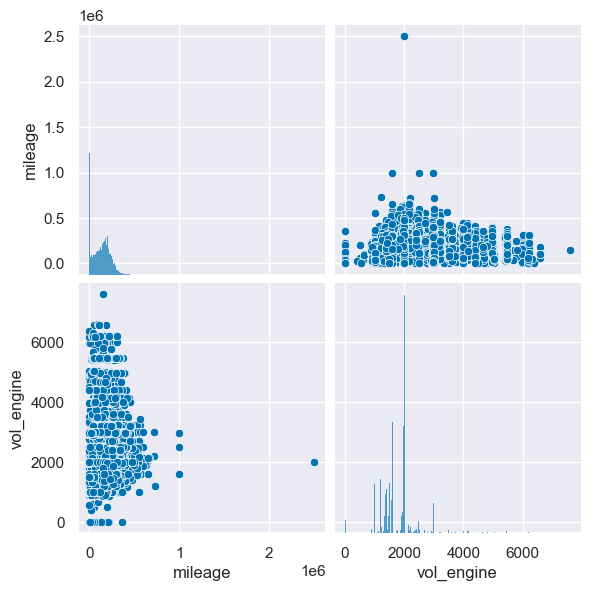

In [336]:
sns.set_palette('colorblind')
sns.pairplot(data=x_train, height=3)

In [317]:
df_clean.head(1)

,year,mileage,vol_engine,price
0,2015,139568,1248,35900


In [318]:
stat, p = pearsonr(X['mileage'], y)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probably independent')
else:
  print('Probably dependent')

stat=-0.543, p=0.000
Probably dependent


In [319]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(X['mileage'], y)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('Probably the same dataset')
else:
  print('Probably different data set')

stat=193.534, p=0.000
Probably different data set


In [320]:
X.head(1)

,mileage,vol_engine
0,139568,1248


### Use the 3D Graph to plot the Data

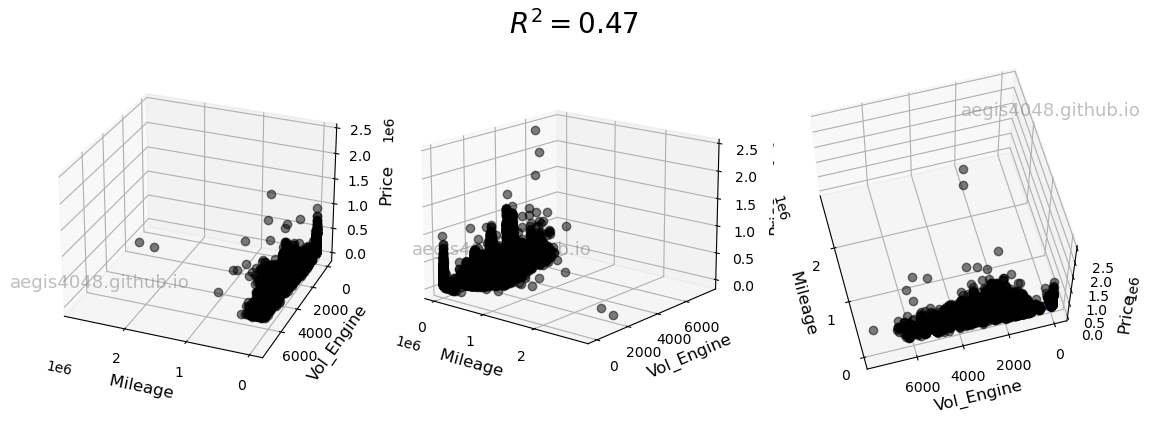

In [323]:
X = df[['mileage', 'vol_engine']].values.reshape(-1,2)
Y = df['price']
x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)
r2 = model.score(X, Y)
 
 
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Mileage ', fontsize=12)
    ax.set_ylabel('Vol_Engine', fontsize=12)
    ax.set_zlabel('Price', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [322]:
r2

0.4715576973047152

In [324]:
for ii in np.arange(0, 360, 1):
    ax.view_init(elev=32, azim=ii)
    fig.savefig('gif_image%d.png' % ii)

## Use the Tree Classifier 

In [325]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [326]:
from sklearn.metrics import accuracy_score
model1 = DecisionTreeClassifier().fit(x_train,y_train)
predicted_values = model1.predict(x_test)
predicted_values

array([ 56900, 119519, 137900, ...,  29900,  12300, 293000])

In [332]:
x_train

,mileage,vol_engine
93703,177119,1975
29295,243500,2494
31424,15000,1995
94740,181900,1582
60833,168200,1796
...,...,...
21243,4500,0
45891,117000,998
42613,41000,999
43567,5,1498


In [327]:
actual_values = y_test

score = accuracy_score(actual_values,predicted_values)
score

0.05632698056008988